In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
def plot_sample(x,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

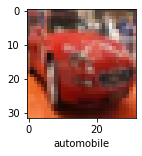

In [12]:
plot_sample(x_train,y_train,5)

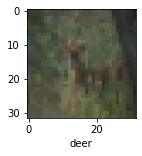

In [13]:
plot_sample(x_train,y_train,10)

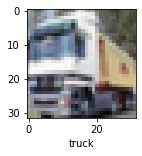

In [14]:
plot_sample(x_train,y_train,1)

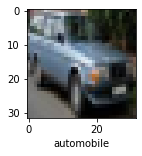

In [15]:
plot_sample(x_train,y_train,201)

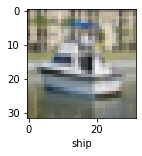

In [16]:
plot_sample(x_train,y_train,501)

In [17]:
x_train=x_train/255.0
x_test=x_test/255.0

In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 102ms/step - accuracy: 0.3043 - loss: 1.9377
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.4169 - loss: 1.6505
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.4502 - loss: 1.5613
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.4760 - loss: 1.4870
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.4904 - loss: 1.4499


In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.47      0.59      0.52      1000
           1       0.51      0.67      0.58      1000
           2       0.34      0.45      0.38      1000
           3       0.46      0.21      0.29      1000
           4       0.40      0.44      0.42      1000
           5       0.57      0.22      0.32      1000
           6       0.61      0.37      0.46      1000
           7       0.55      0.53      0.54      1000
           8       0.48      0.73      0.58      1000
           9       0.51      0.56      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



In [20]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

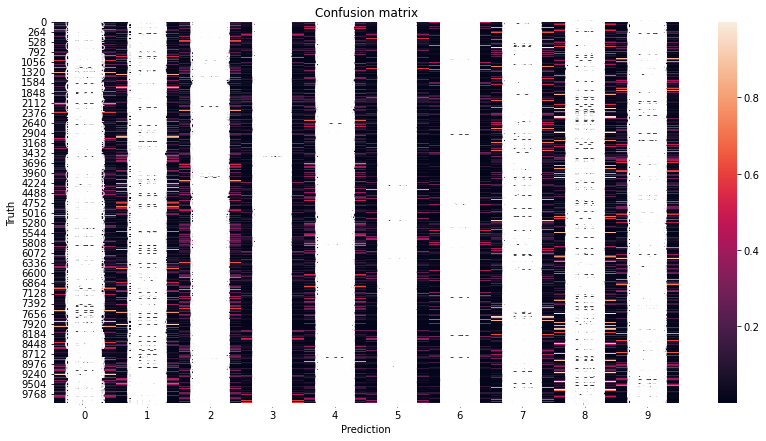

In [21]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [22]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 67ms/step - accuracy: 0.3961 - loss: 1.6625
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.6136 - loss: 1.1075
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.6585 - loss: 0.9766
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.6941 - loss: 0.8810
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.7163 - loss: 0.8158
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.7371 - loss: 0.7600
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.7596 - loss: 0.6995
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 67ms/step - accuracy: 0.7731 - loss: 0.6562
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.7882 - loss: 0.6113
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.8019 - loss: 0.5754


In [26]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7069 - loss: 0.9122


[0.9327918291091919, 0.7014999985694885]

In [27]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


array([[1.6964634e-05, 5.9942837e-04, 4.2575915e-04, 9.7408241e-01,
        1.2748182e-03, 2.0562647e-02, 6.7435560e-04, 1.2086246e-05,
        2.3177515e-03, 3.3748547e-05],
       [1.4217237e-03, 1.3669555e-01, 8.5311677e-07, 7.4580328e-08,
        5.3567648e-09, 2.3116424e-09, 5.3309589e-07, 2.5492580e-08,
        8.6179054e-01, 9.0761816e-05],
       [3.6757558e-03, 3.1197914e-01, 1.3908413e-03, 1.8895780e-03,
        1.8042194e-03, 9.6471820e-05, 7.5248281e-05, 1.2176338e-04,
        6.7563736e-01, 3.3295767e-03],
       [6.8527216e-01, 1.4816714e-02, 6.8844266e-02, 4.7168583e-03,
        1.0633739e-01, 5.3894477e-05, 9.1377675e-04, 5.0785998e-06,
        1.1832240e-01, 7.1742444e-04],
       [2.7216404e-07, 1.0601657e-06, 5.3915982e-03, 5.3595450e-02,
        7.8494854e-02, 4.9373088e-04, 8.6202294e-01, 1.2220295e-08,
        1.4140119e-07, 3.1349373e-08]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

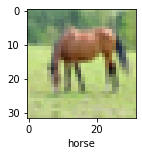

In [30]:
plot_sample(x_test, y_test , 60)

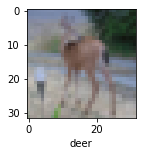

In [31]:
plot_sample(x_test, y_test, 100)

In [32]:
classes[y_classes[60]]

'horse'

In [33]:
classes[y_classes[100]]

'deer'